# Fit B-Splines to $a$

## Running with PypeIt!

In [52]:
# imports
import os
from importlib import reload
import numpy as np

from sklearn import decomposition

from matplotlib import pyplot as plt
import seaborn as sns

import xarray

#from pypeit.core import fitting
#from pypeit.bspline import bspline
from oceancolor.ihop import bspline
from oceancolor import water

In [2]:
%matplotlib ipympl

# Info

## X=1,2,4:  Nothing, Raman, Raman+Flourescence

## YY = Sun zenith angle

## 3320 different IOP combinations

# Load 

In [3]:
l23_path = os.path.join(os.getenv('OS_COLOR'),
                        'data' ,'Loisel2023')

## Variables

In [4]:
variable_file = os.path.join(l23_path, 'Hydrolight400.nc')

In [5]:
ds = xarray.load_dataset(variable_file)
ds

<xarray.Dataset>
Dimensions:  (Lambda: 81, IOP_Scenario: 3320)
Coordinates:
  * Lambda   (Lambda) float32 350.0 355.0 360.0 365.0 ... 740.0 745.0 750.0
Dimensions without coordinates: IOP_Scenario
Data variables: (12/17)
    Rrs      (IOP_Scenario, Lambda) float32 0.01176 0.01201 ... 3.041e-05
    Ed_0+    (IOP_Scenario, Lambda) float32 0.7753 0.7314 0.7207 ... 1.237 1.222
    Lw       (IOP_Scenario, Lambda) float32 0.009118 0.008785 ... 3.716e-05
    Lu_0+    (IOP_Scenario, Lambda) float32 0.04075 0.03903 ... 0.06316 0.0624
    a        (IOP_Scenario, Lambda) float32 0.03096 0.02925 ... 2.83 2.85
    anw      (IOP_Scenario, Lambda) float32 0.02386 0.02245 ... 0.0005 0.0004
    ...       ...
    bph      (IOP_Scenario, Lambda) float32 0.04521 0.04454 ... 0.1013 0.1008
    bd       (IOP_Scenario, Lambda) float32 0.03323 0.03239 ... 0.03532 0.03513
    bb       (IOP_Scenario, Lambda) float32 0.006968 0.006587 ... 0.001876
    bbnw     (IOP_Scenario, Lambda) float32 0.00105 0.001028 ... 0.001641
    bbph     (IOP_Scenario, Lambda) float32 0.0004521 0.0004454 ... 0.001008
    bbd      (IOP_Scenario, Lambda) float32 0.0005982 0.000583 ... 0.0006324

In [6]:
wv64 = ds.Lambda.data.astype(np.float64)
wv64

array([350., 355., 360., 365., 370., 375., 380., 385., 390., 395., 400.,
       405., 410., 415., 420., 425., 430., 435., 440., 445., 450., 455.,
       460., 465., 470., 475., 480., 485., 490., 495., 500., 505., 510.,
       515., 520., 525., 530., 535., 540., 545., 550., 555., 560., 565.,
       570., 575., 580., 585., 590., 595., 600., 605., 610., 615., 620.,
       625., 630., 635., 640., 645., 650., 655., 660., 665., 670., 675.,
       680., 685., 690., 695., 700., 705., 710., 715., 720., 725., 730.,
       735., 740., 745., 750.])

## Water

In [57]:
reload(water)
a_w = water.a_water(wv64)
a_w.size

81

# Plot a few

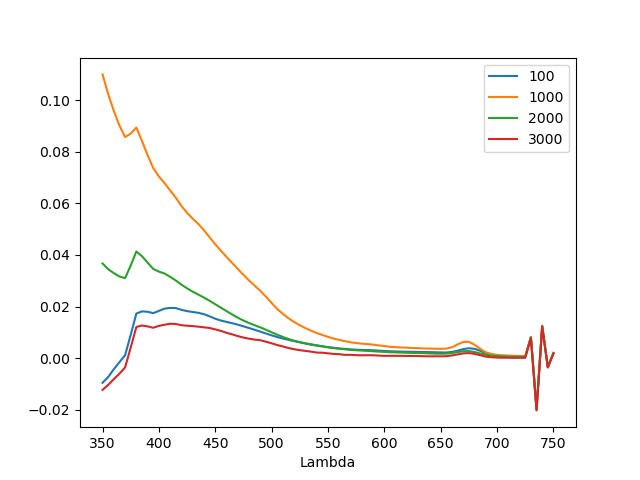

In [58]:
#waves = ds.Lambda.data < 600.
waves = ds.Lambda.data == ds.Lambda.data
fig = plt.figure()
plt.clf()
ax = plt.gca()
sns.lineplot(x=ds.Lambda[waves], y=ds.a.data[100,waves]-a_w, ax=ax, label='100')
sns.lineplot(x=ds.Lambda[waves], y=ds.a.data[1000,waves]-a_w, ax=ax, label='1000')
sns.lineplot(x=ds.Lambda[waves], y=ds.a.data[2000,waves]-a_w, ax=ax, label='2000')
sns.lineplot(x=ds.Lambda[waves], y=ds.a.data[3000,waves]-a_w, ax=ax, label='3000')
ax.legend()

plt.show()

# B-spline time

## Init

In [35]:
reload(bspline)
bkpts = bspline.set_a_bkpts(everyn=4)
bkpts

array([340. , 352.5, 372.5, 392.5, 412.5, 432.5, 452.5, 472.5, 492.5,
       512.5, 532.5, 552.5, 572.5, 592.5, 612.5, 632.5, 652.5, 672.5,
       692.5, 712.5, 732.5, 752.5, 755. ])

In [46]:
wv64

array([350., 355., 360., 365., 370., 375., 380., 385., 390., 395., 400.,
       405., 410., 415., 420., 425., 430., 435., 440., 445., 450., 455.,
       460., 465., 470., 475., 480., 485., 490., 495., 500., 505., 510.,
       515., 520., 525., 530., 535., 540., 545., 550., 555., 560., 565.,
       570., 575., 580., 585., 590., 595., 600., 605., 610., 615., 620.,
       625., 630., 635., 640., 645., 650., 655., 660., 665., 670., 675.,
       680., 685., 690., 695., 700., 705., 710., 715., 720., 725., 730.,
       735., 740., 745., 750.])

In [47]:
my_bspline = bspline.bspline(wv64, nord=3, 
                     #everyn=3) 
                     fullbkpt=bkpts)
                     #nbkpts=14)
                     #everyn=4) 

In [49]:
idx = 1000
code, yfit = my_bspline.fit(wv64, 
                            ds.a.data[idx,:].astype(np.float64),
                        np.ones_like(wv64[:]))
code

0

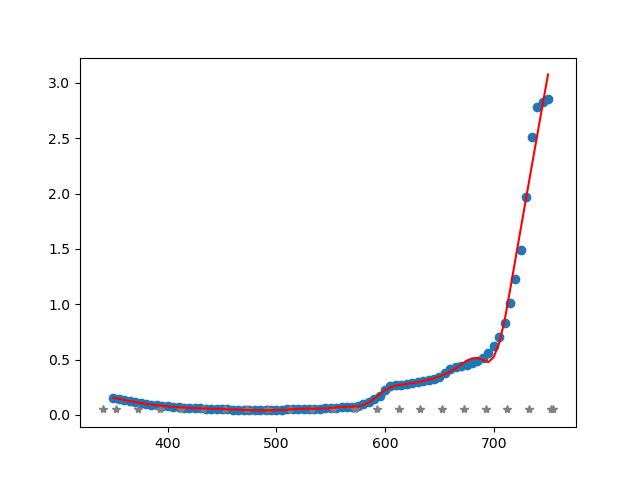

In [51]:
fig = plt.figure()
plt.clf()
ax = plt.gca()
#
# Data
ax.plot(wv64, ds.a.data[idx,:], 'o')
# Breakpoints
ax.plot(my_bspline.breakpoints, 
        0.05*np.ones(len(my_bspline.breakpoints)), '*', color='gray')

# Fit
ax.plot(wv64, yfit, 'r-')

plt.show()

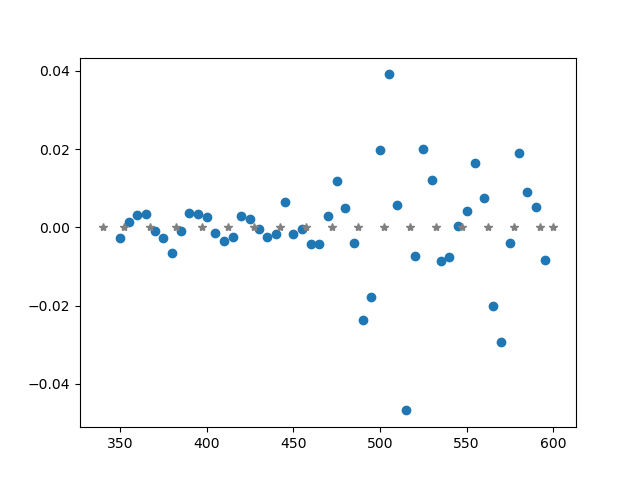

In [29]:
fig = plt.figure()

plt.clf()
ax = plt.gca()
#
# Data
ax.plot(wv64[cut], (yfit-ds.a.data[idx,cut])/yfit, 'o')
# Breakpoints
ax.plot(my_bspline.breakpoints, 
        0.*np.ones(len(my_bspline.breakpoints)), '*', color='gray')

# Fit
#ax.plot(wv64[cut], yfit, 'r-')

plt.show()